In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Datos 17-18

In [2]:
def expected_returns(data, h, d, a, ncol, name_column):
    new_col = data.apply(lambda x: 1/x[h] + 1/x[d] + 1/x[a], axis=1)
    data.insert(loc=ncol, column=name_column, value=new_col)

def predictions(data, h, d, a, rets, ncol):
    ph = data.apply(lambda x: 1/x[h]/x[rets], axis=1)
    pd = data.apply(lambda x: 1/x[d]/x[rets], axis=1)
    pa = data.apply(lambda x: 1/x[a]/x[rets], axis=1)
    data.insert(loc=ncol, column='ph', value=ph)
    data.insert(loc=ncol+1, column='pd', value=pd)
    data.insert(loc=ncol+2, column='pa', value=pa)

def transform_month(data):
    # ADD 1 MONTH BECOUSE DATA IS TAKEN AT THE FINAL OF THE MONTH
    # THUS FOR ANALYSIS IN THE MATCHES OF OCTOBER I USE DATA OF SEPTEMBER
    # IN AUGUST WE DO NOT HAVE DATA OF JULY SO I WILL REPEATE AND USE THE DATA OF FINALS OF MONTH
    data.loc[data['Date'] == 8, 'Date'] = '09'
    data.loc[data['Date'] == 9, 'Date'] = '10'
    data.loc[data['Date'] == 10, 'Date'] = '11'
    data.loc[data['Date'] == 11, 'Date'] = '12'
    data.loc[data['Date'] == 12, 'Date'] = '01'
    data.loc[data['Date'] == 1, 'Date'] = '02'
    data.loc[data['Date'] == 2, 'Date'] = '03'
    data.loc[data['Date'] == 3, 'Date'] = '04'
    data.loc[data['Date'] == 4, 'Date'] = '05'
    data.loc[data['Date'] == 5, 'Date'] = '06'

def transform_team(data):
    data.loc[data['Team'] == 'FC Barcelona', 'Team'] = 'Barcelona'
    data.loc[data['Team'] == 'Atlético Madrid', 'Team'] = 'Ath Madrid'
    data.loc[data['Team'] == 'Valencia CF', 'Team'] = 'Valencia'
    data.loc[data['Team'] == 'Villarreal CF', 'Team'] = 'Villarreal'
    data.loc[data['Team'] == 'Real Betis', 'Team'] = 'Betis'
    data.loc[data['Team'] == 'Athletic Bilbao', 'Team'] = 'Ath Bilbao'
    data.loc[data['Team'] == 'Sevilla FC', 'Team'] = 'Sevilla'
    data.loc[data['Team'] == 'SD Eibar', 'Team'] = 'Eibar'
    data.loc[data['Team'] == 'Celta Vigo', 'Team'] = 'Celta'
    data.loc[data['Team'] == 'Real Sociedad', 'Team'] = 'Sociedad'
    data.loc[data['Team'] == 'Getafe CF', 'Team'] = 'Getafe'
    data.loc[data['Team'] == 'RCD Espanyol', 'Team'] = 'Espanol'
    data.loc[data['Team'] == 'Girona CF', 'Team'] = 'Girona'
    data.loc[data['Team'] == 'Levante UD', 'Team'] = 'Levante'
    data.loc[data['Team'] == 'Deport. Alavés', 'Team'] = 'Alaves'
    data.loc[data['Team'] == 'CD Leganés', 'Team'] = 'Leganes'
    data.loc[data['Team'] == 'RC Deportivo', 'Team'] = 'La Coruna'
    data.loc[data['Team'] == 'UD Las Palmas', 'Team'] = 'Las Palmas'
    data.loc[data['Team'] == 'Málaga CF', 'Team'] = 'Malaga'
    
def add_team_score(data, data_scores):
    ATTH, MIDH, DEFH, ATTA, MIDA, DEFA = [], [], [], [], [], []
    for h, a, m in data[['HomeTeam', 'AwayTeam', 'Month']].values:
        if m == '08': # DATA BEGINS MID AUGUST, TAKE AUGUST IN MATCHES OF AUGUST AS WELL AS SEPTEMBER
            m = '09'
        ATTH.append(data_scores['ATT'][(data_scores['Team'] == h) & (data_scores['Date'] == m)].values[0])
        MIDH.append(data_scores['MID'][(data_scores['Team'] == h) & (data_scores['Date'] == m)].values[0])
        DEFH.append(data_scores['DEF'][(data_scores['Team'] == h) & (data_scores['Date'] == m)].values[0])
        ATTA.append(data_scores['ATT'][(data_scores['Team'] == a) & (data_scores['Date'] == m)].values[0])
        MIDA.append(data_scores['MID'][(data_scores['Team'] == a) & (data_scores['Date'] == m)].values[0])
        DEFA.append(data_scores['DEF'][(data_scores['Team'] == a) & (data_scores['Date'] == m)].values[0])
    data.insert(loc=4, column='ATTH', value=ATTH)
    data.insert(loc=5, column='MIDH', value=MIDH)
    data.insert(loc=6, column='DEFH', value=DEFH)
    data.insert(loc=7, column='ATTA', value=ATTA)
    data.insert(loc=8, column='MIDA', value=MIDA)
    data.insert(loc=9, column='DEFA', value=DEFA)
    
def transform_data(data_liga):
    features = ['Date', 'HomeTeam', 'AwayTeam',
            'BbAvH', 'BbAvD', 'BbAvA',
            'B365H', 'B365D', 'B365A',
            'FTHG', 'FTAG', 'FTR']
    data = data_liga[features]
    expected_returns(data, 'BbAvH', 'BbAvD', 'BbAvA', 6, 'BbAvHRet')
    predictions(data, 'BbAvH', 'BbAvD', 'BbAvA', 'BbAvHRet', 7)
    data = data.drop(['BbAvH', 'BbAvD', 'BbAvA', 'BbAvHRet'], axis=1)
    new_col = data.apply(lambda x: x['Date'].split('/')[1], axis=1)
    data.insert(loc=1, column='Month', value=new_col)
    data_fifa = pd.read_csv('Datos/Features_FIFA_score/fifaindex_1718.csv')
    transform_month(data_fifa)
    transform_team(data_fifa)
    add_team_score(data, data_fifa)
    return data
data_liga = pd.read_csv('Datos/2017-2018-1eraDivision.csv')
data_1718 = transform_data(data_liga)

# Datos 18-19

In [3]:
def expected_returns(data, h, d, a, ncol, name_column):
    new_col = data.apply(lambda x: 1/x[h] + 1/x[d] + 1/x[a], axis=1)
    data.insert(loc=ncol, column=name_column, value=new_col)

def predictions(data, h, d, a, rets, ncol):
    ph = data.apply(lambda x: 1/x[h]/x[rets], axis=1)
    pd = data.apply(lambda x: 1/x[d]/x[rets], axis=1)
    pa = data.apply(lambda x: 1/x[a]/x[rets], axis=1)
    data.insert(loc=ncol, column='ph', value=ph)
    data.insert(loc=ncol+1, column='pd', value=pd)
    data.insert(loc=ncol+2, column='pa', value=pa)

def transform_month(data):
    data.loc[data['Date'] == 8, 'Date'] = '09'
    data.loc[data['Date'] == 9, 'Date'] = '10'
    data.loc[data['Date'] == 10, 'Date'] = '11'
    data.loc[data['Date'] == 11, 'Date'] = '12'
    data.loc[data['Date'] == 12, 'Date'] = '01'
    data.loc[data['Date'] == 1, 'Date'] = '02'
    data.loc[data['Date'] == 2, 'Date'] = '03'
    data.loc[data['Date'] == 3, 'Date'] = '04'
    data.loc[data['Date'] == 4, 'Date'] = '05'
    data.loc[data['Date'] == 5, 'Date'] = '06'

def transform_team(data):
    data.loc[data['Team'] == 'FC Barcelona', 'Team'] = 'Barcelona'
    data.loc[data['Team'] == 'Atlético Madrid', 'Team'] = 'Ath Madrid'
    data.loc[data['Team'] == 'Valencia CF', 'Team'] = 'Valencia'
    data.loc[data['Team'] == 'Villarreal CF', 'Team'] = 'Villarreal'
    data.loc[data['Team'] == 'Real Betis', 'Team'] = 'Betis'
    data.loc[data['Team'] == 'Athletic Club', 'Team'] = 'Ath Bilbao'
    data.loc[data['Team'] == 'Sevilla FC', 'Team'] = 'Sevilla'
    data.loc[data['Team'] == 'SD Eibar', 'Team'] = 'Eibar'
    data.loc[data['Team'] == 'RC Celta', 'Team'] = 'Celta'
    data.loc[data['Team'] == 'Real Sociedad', 'Team'] = 'Sociedad'
    data.loc[data['Team'] == 'Getafe CF', 'Team'] = 'Getafe'
    data.loc[data['Team'] == 'RCD Espanyol', 'Team'] = 'Espanol'
    data.loc[data['Team'] == 'Girona FC', 'Team'] = 'Girona'
    data.loc[data['Team'] == 'Levante UD', 'Team'] = 'Levante'
    data.loc[data['Team'] == 'D. Alavés', 'Team'] = 'Alaves'
    data.loc[data['Team'] == 'CD Leganés', 'Team'] = 'Leganes'
    data.loc[data['Team'] == 'SD Huesca', 'Team'] = 'Huesca'
    data.loc[data['Team'] == 'Rayo Vallecano', 'Team'] = 'Vallecano'
    data.loc[data['Team'] == 'R. Valladolid CF', 'Team'] = 'Valladolid'
    
def add_team_score(data, data_scores):
    ATTH, MIDH, DEFH, ATTA, MIDA, DEFA = [], [], [], [], [], []
    for h, a, m in data[['HomeTeam', 'AwayTeam', 'Month']].values:
        if m == '08': # DATA BEGINS MID AUGUST, TAKE AUGUST IN MATCHES OF AUGUST AS WELL AS SEPTEMBER
            m = '09'
        ATTH.append(data_scores['ATT'][(data_scores['Team'] == h) & (data_scores['Date'] == m)].values[0])
        MIDH.append(data_scores['MID'][(data_scores['Team'] == h) & (data_scores['Date'] == m)].values[0])
        DEFH.append(data_scores['DEF'][(data_scores['Team'] == h) & (data_scores['Date'] == m)].values[0])
        ATTA.append(data_scores['ATT'][(data_scores['Team'] == a) & (data_scores['Date'] == m)].values[0])
        MIDA.append(data_scores['MID'][(data_scores['Team'] == a) & (data_scores['Date'] == m)].values[0])
        DEFA.append(data_scores['DEF'][(data_scores['Team'] == a) & (data_scores['Date'] == m)].values[0])
    data.insert(loc=4, column='ATTH', value=ATTH)
    data.insert(loc=5, column='MIDH', value=MIDH)
    data.insert(loc=6, column='DEFH', value=DEFH)
    data.insert(loc=7, column='ATTA', value=ATTA)
    data.insert(loc=8, column='MIDA', value=MIDA)
    data.insert(loc=9, column='DEFA', value=DEFA)
    
def transform_data(data_liga):
    features = ['Date', 'HomeTeam', 'AwayTeam',
            'BbAvH', 'BbAvD', 'BbAvA',
            'B365H', 'B365D', 'B365A',
            'FTHG', 'FTAG', 'FTR']
    data = data_liga[features]
    expected_returns(data, 'BbAvH', 'BbAvD', 'BbAvA', 6, 'BbAvHRet')
    predictions(data, 'BbAvH', 'BbAvD', 'BbAvA', 'BbAvHRet', 7)
    data = data.drop(['BbAvH', 'BbAvD', 'BbAvA', 'BbAvHRet'], axis=1)
    new_col = data.apply(lambda x: x['Date'].split('/')[1], axis=1)
    data.insert(loc=1, column='Month', value=new_col)
    data_fifa = pd.read_csv('Datos/Features_FIFA_score/fifaindex_1819.csv')
    transform_month(data_fifa)
    transform_team(data_fifa)
    add_team_score(data, data_fifa)
    return data
data_liga = pd.read_csv('Datos/2018-2019-1eraDivision.csv')
data_1819 = transform_data(data_liga)

# Junto ambos

In [4]:
data = data_1718.append(data_1819, ignore_index=True)
data.drop(['Month'], axis=1).head()

,Date,HomeTeam,AwayTeam,ATTH,MIDH,DEFH,ATTA,MIDA,DEFA,ph,pd,pa,B365H,B365D,B365A,FTHG,FTAG,FTR
0,18/08/17,Leganes,Alaves,74,75,74,70,75,74,0.469207,0.302378,0.228415,2.05,3.20,4.10,1,0,H
1,18/08/17,Valencia,Las Palmas,78,80,79,75,78,76,0.538964,0.247142,0.213894,1.75,3.80,4.50,1,0,H
2,19/08/17,Celta,Sociedad,77,78,78,81,79,77,0.397788,0.286360,0.315852,2.38,3.25,3.20,2,3,A
3,19/08/17,Girona,Ath Madrid,76,73,73,84,82,84,0.126685,0.228762,0.644553,8.00,4.33,1.45,2,2,D
4,19/08/17,Sevilla,Espanol,80,80,79,78,79,76,0.585867,0.242993,0.171140,1.62,4.00,5.50,1,1,D


In [5]:
print(min(data['ATTH']), max(data['ATTH']))
print(min(data['MIDH']), max(data['MIDH']))
print(min(data['DEFH']), max(data['DEFH']))

70 89
72 89
71 86


In [5]:
from sklearn import preprocessing

x = data[['ATTH', 'MIDH', 'DEFH', 'ATTA', 'MIDA', 'DEFA']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data[['ATTH', 'MIDH', 'DEFH', 'ATTA', 'MIDA', 'DEFA']] = pd.DataFrame(x_scaled)

In [7]:
data.drop(['Month'], axis=1).head()

,Date,HomeTeam,AwayTeam,ATTH,MIDH,DEFH,ATTA,MIDA,DEFA,ph,pd,pa,B365H,B365D,B365A,FTHG,FTAG,FTR
0,18/08/17,Leganes,Alaves,0.210526,0.176471,0.200000,0.000000,0.176471,0.200000,0.469207,0.302378,0.228415,2.05,3.20,4.10,1,0,H
1,18/08/17,Valencia,Las Palmas,0.421053,0.470588,0.533333,0.263158,0.352941,0.333333,0.538964,0.247142,0.213894,1.75,3.80,4.50,1,0,H
2,19/08/17,Celta,Sociedad,0.368421,0.352941,0.466667,0.578947,0.411765,0.400000,0.397788,0.286360,0.315852,2.38,3.25,3.20,2,3,A
3,19/08/17,Girona,Ath Madrid,0.315789,0.058824,0.133333,0.736842,0.588235,0.866667,0.126685,0.228762,0.644553,8.00,4.33,1.45,2,2,D
4,19/08/17,Sevilla,Espanol,0.526316,0.470588,0.533333,0.421053,0.411765,0.333333,0.585867,0.242993,0.171140,1.62,4.00,5.50,1,1,D


In [189]:
def customs(odds_h, odds_d, odds_a, goals_h, goals_a, win_home, draw, win_away):
    dif_hd = (goals_h-goals_a)
    
    vec_h = (win_home * (odds_h-1)*(1 + np.sqrt(np.abs(dif_hd*odds_h/odds_a)/4)) - (1-win_home))
    vec_d = (draw * (odds_d-1)*(1 + np.sqrt(np.abs(odds_h-odds_a))/4) - (1-draw))
    vec_a = (win_away*(odds_a-1)*(1+np.sqrt(np.abs(dif_hd*odds_a/odds_h))/4) - (1-win_away))
    vec_n = -0.0001
    
    return vec_h, vec_d, vec_a, vec_n

In [187]:
odds_h = 1.1
odds_d = 4
odds_a = 7

goals_h = 1
goals_a = 2
win_home = 0
draw = 0
win_away = 1

In [186]:
h, d, a, n = customs(odds_h, odds_d, odds_a, goals_h, goals_a, win_home, draw, win_away)
print('  vh= ', h, '  vd= ', d, '  va= ', a, '  vn= ', n)
print('sum= ', h+d+a+n)

  vh=  0.10991031208965124   vd=  -1.0   va=  -1.0   vn=  -0.0001
sum=  -1.8901896879103488


In [177]:
h, d, a, n = customs(odds_h, odds_d, odds_a, goals_h, goals_a, win_home, draw, win_away)
print('  vh= ', h, '  vd= ', d, '  va= ', a, '  vn= ', n)
print('sum= ', h+d+a+n)

  vh=  -1.0   vd=  4.033803656406767   va=  -1.0   vn=  -0.0001
sum=  2.0337036564067668


In [190]:
h, d, a, n = customs(odds_h, odds_d, odds_a, goals_h, goals_a, win_home, draw, win_away)
print('  vh= ', h, '  vd= ', d, '  va= ', a, '  vn= ', n)
print('sum= ', h+d+a+n)

  vh=  -1.0   vd=  -1.0   va=  9.783937343321348   vn=  -0.0001
sum=  7.783837343321348


# Modelo

In [209]:
def get_data(data):
    X = data.values[:, 4:13]
    out = data.values[:, -1]
    y_full = np.zeros((X.shape[0], 9))
    for i, y_i in enumerate(out):
        if y_i == 'H':
            y_full[i, 0] = 1.0
        if y_i == 'D':
            y_full[i, 1] = 1.0
        if y_i == 'A':
            y_full[i, 2] = 1.0
        y_full[i, 4] = data.values[i, 13] # HOME ODDS
        y_full[i, 5] = data.values[i, 14] # DRAW ODDS
        y_full[i, 6] = data.values[i, 15] # AWAY ODDS
        y_full[i, 7] = data.values[i, 16] # Home goals
        y_full[i, 8] = data.values[i, 17] # Away goals
    
    return X, y_full, out


def custom_metrics(y_true, y_pred):
    win_home = y_true[:, 0:1]
    draw = y_true[:, 1:2]
    win_away = y_true[:, 2:3]
    
    odds_h = y_true[:, 4:5]
    odds_d = y_true[:, 5:6]
    odds_a = y_true[:, 6:7]

    dif_hd = (y_true[:, 7:8]-y_true[:, 8:9])
    
    vec_h = (win_home * (odds_h-1)*(1 + K.sqrt(K.abs(dif_hd*odds_h/odds_a))/4) - (1-win_home))
    vec_d = (draw * (odds_d-1)*(1 + K.sqrt(K.abs(odds_h-odds_a)/4)/2) - (1-draw))
    vec_a = (win_away*(odds_a-1)*(1 + K.sqrt(K.abs(dif_hd*odds_a/odds_h))/4) - (1-win_away))
    vec_n = -0.00000011*K.zeros_like(odds_d)
    
    gain_loss_vector = K.concatenate([vec_h, vec_d, vec_a, vec_n], axis=1)
    
    media = -K.mean(K.sum(gain_loss_vector * y_pred, axis=1))
    return media

def get_model(input_dim, output_dim, base, multiplier, dropout):
    inputs = Input(shape=(input_dim,))
    l = BatchNormalization()(inputs)
    l = Dropout(dropout)(l)
    n = base
    l = Dense(n, activation='relu', kernel_initializer='random_uniform')(l)
    l = BatchNormalization()(l)
    l = Dropout(dropout)(l)
    n = int(n * multiplier)
    l = Dense(n, activation='sigmoid')(l)
    #     l = Dense(n, activation='relu')(l)
    l = BatchNormalization()(l)
    l = Dropout(dropout)(l)
    n = int(n * multiplier)
    l = Dense(n, activation='relu')(l)
    outputs = Dense(output_dim, activation='softmax')(l)
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [10]:
def get_data(data):
    X = data.values[:, 4:13]
    out = data.values[:, -1]
    y_full = np.zeros((X.shape[0], 9))
    for i, y_i in enumerate(out):
        if y_i == 'H':
            y_full[i, 0] = 1.0
        if y_i == 'D':
            y_full[i, 1] = 1.0
        if y_i == 'A':
            y_full[i, 2] = 1.0
        y_full[i, 4] = data.values[i, 13] # HOME ODDS
        y_full[i, 5] = data.values[i, 14] # DRAW ODDS
        y_full[i, 6] = data.values[i, 15] # AWAY ODDS
        y_full[i, 7] = data.values[i, 16] # Home goals
        y_full[i, 8] = data.values[i, 17] # Away goals
    
    return X, y_full, out


def custom_metrics(y_true, y_pred):
    win_home = y_true[:, 0:1]
    draw = y_true[:, 1:2]
    win_away = y_true[:, 2:3]
    
    odds_h = y_true[:, 4:5]
    odds_d = y_true[:, 5:6]
    odds_a = y_true[:, 6:7]

    dif_hd = (y_true[:, 7:8]-y_true[:, 8:9])
    
    vec_h = (win_home * (odds_h-1)*(1 + K.sqrt(K.abs(dif_hd*odds_h/odds_a))/4) - (1-win_home))
    vec_d = (draw * (odds_d-1)*(1 + K.sqrt(K.abs(odds_h-odds_a)/4)/2) - (1-draw))
    vec_a = (win_away*(odds_a-1)*(1 + K.sqrt(K.abs(dif_hd*odds_a/odds_h))/4) - (1-win_away))
    vec_n = -0.00000011*K.zeros_like(odds_d)
    
    gain_loss_vector = K.concatenate([vec_h, vec_d, vec_a, vec_n], axis=1)
    
    media = -K.mean(K.sum(gain_loss_vector * y_pred, axis=1))
    return media

def make_classifier():
    clf = CatBoostClassifier(
        loss_function=custom_metrics,
        eval_metric=custom_metrics,
        task_type="CPU",
        learning_rate=0.01,
        iterations=2000,
        od_type="Iter",
        # depth=8,
        early_stopping_rounds=30,
        #l2_leaf_reg=1,
        #border_count=96,
        random_seed=42
    )
        
    return clf

In [11]:
from sklearn.model_selection import train_test_split
X, y, outcome = get_data(data)
train_x, test_x, train_y, test_y, = train_test_split(X,  y, test_size = 0.3)

In [12]:
from catboost import CatBoostClassifier

clf = make_classifier()
clf.fit(train_x, train_y, 
        eval_set=(test_x, test_y),
        use_best_model=True, 
        verbose=500)
#         , cat_features=cat_features)

CatBoostError: catboost/libs/metrics/metric.cpp:4643: All train targets are equal

In [194]:
from sklearn.model_selection import train_test_split
from keras.layers import BatchNormalization, Dense, Input, Dropout
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras import optimizers

X, y, outcome = get_data(data)
train_x, test_x, train_y, test_y, = train_test_split(X,  y, test_size = 0.3)

In [210]:
model = get_model(9, 4, 1000, 0.95, 0.7)
sgd = optimizers.SGD(lr=0.01, clipvalue=0.5)
model.compile(optimizer='Nadam', loss=custom_metrics)
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    epochs=30, batch_size=10,
                    callbacks = [EarlyStopping(patience=5), 
                                 ModelCheckpoint('finde3.hdf5',
                                                 save_best_only=True)
                                ])

Train on 532 samples, validate on 228 samples
Epoch 1/30
532/532 [==============================] - 5s 10ms/step - loss: -0.2384 - val_loss: -0.3789
Epoch 2/30
532/532 [==============================] - 3s 6ms/step - loss: -0.1706 - val_loss: -0.3781
Epoch 3/30
532/532 [==============================] - 3s 6ms/step - loss: -0.1632 - val_loss: -0.2384
Epoch 4/30
532/532 [==============================] - 3s 6ms/step - loss: -0.1360 - val_loss: -0.0652
Epoch 5/30
532/532 [==============================] - 3s 6ms/step - loss: -0.2447 - val_loss: 0.0753
Epoch 6/30
532/532 [==============================] - 3s 6ms/step - loss: -0.2840 - val_loss: -0.2277


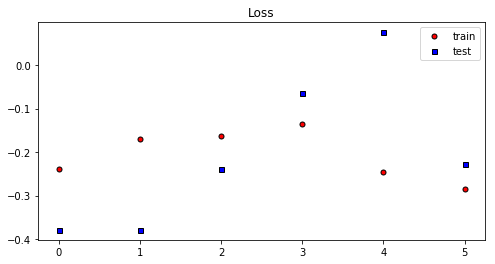

In [211]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_title('Loss')
ax.plot(history.history['loss'], ls='', marker='o', ms=5, mec='k', mfc='r', label='train')
ax.plot(history.history['val_loss'], ls = '', marker='s', ms=5, mec='k', mfc='b', label='test')
ax.legend()

# Unique bet

In [17]:
# all_x = data.values[:, 4:13]
# preds = model.predict(all_x)
# predictions = []
# for i in preds:
#     if np.argmax(i) == 0:
#         predictions.append('H')
#     elif np.argmax(i) == 1:
#         predictions.append('D')
#     elif np.argmax(i) == 2:
#         predictions.append('A')
#     elif np.argmax(i) == 3:
#         predictions.append('NO')
        
# data['MaxPred'] = predictions
data['MaxPred'].unique()

array(['H', 'D'], dtype=object)

# Multiple bets

In [212]:
preds = model.predict(X)

data['PredH'] = preds[:, 0]
data['PredD'] = preds[:, 1]
data['PredA'] = preds[:, 2]
data['PredNO'] = preds[:, 3]

In [213]:
data.drop(['Date', 'Month', 'ATTH', 'MIDH', 'DEFH', 'ATTA', 'MIDA', 'DEFA'], axis=1).head(10)

,HomeTeam,AwayTeam,ph,pd,pa,B365H,B365D,B365A,FTHG,FTAG,FTR,PredH,PredD,PredA,PredNO
0,Leganes,Alaves,0.469207,0.302378,0.228415,2.05,3.20,4.10,1,0,H,2.532827e-06,3.002235e-03,5.754187e-08,9.969952e-01
1,Valencia,Las Palmas,0.538964,0.247142,0.213894,1.75,3.80,4.50,1,0,H,2.044291e-35,1.000000e+00,0.000000e+00,1.791260e-31
2,Celta,Sociedad,0.397788,0.286360,0.315852,2.38,3.25,3.20,2,3,A,3.797892e-22,1.000000e+00,1.393713e-28,3.561984e-21
3,Girona,Ath Madrid,0.126685,0.228762,0.644553,8.00,4.33,1.45,2,2,D,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
4,Sevilla,Espanol,0.585867,0.242993,0.171140,1.62,4.00,5.50,1,1,D,9.582798e-34,1.000000e+00,0.000000e+00,6.464434e-27
5,Ath Bilbao,Getafe,0.634578,0.228265,0.137157,1.50,4.00,7.50,0,0,D,0.000000e+00,1.000000e+00,0.000000e+00,9.864257e-37
6,Barcelona,Betis,0.797900,0.133544,0.068556,1.17,8.00,15.00,2,0,H,9.388900e-31,1.000000e+00,0.000000e+00,6.401899e-14
7,La Coruna,Real Madrid,0.098341,0.174989,0.726671,9.50,5.75,1.30,0,3,A,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
8,Levante,Villarreal,0.290728,0.298982,0.410291,3.25,3.25,2.30,1,0,H,3.862914e-29,1.670893e-32,1.000000e+00,1.351469e-32
9,Malaga,Eibar,0.433975,0.290204,0.275821,2.10,3.30,3.70,0,1,A,2.616465e-19,1.000000e+00,2.472953e-26,6.532738e-17


In [214]:
def gains_predictions(data, predict, house_bet_h, house_bet_a, house_bet_d):
    i = 0
    gain_journey = []
    for j in range(int(len(data)/10)):
        print('- Jornada nº{}/{}'.format(j+1,int(len(data)/10)))
        betted = 0
        accuracy = 0
        profits = 0
        for k in range(10):
            if data['FTR'][i] == 'H':
                profits += data['PredH'][i]*data['B365H'][i]
            if data['FTR'][i] == 'A':
                profits += data['PredA'][i]*data['B365A'][i]
            if data['FTR'][i] == 'D':
                profits += data['PredD'][i]*data['B365D'][i]
            betted += 1-data['PredNO'][i]
            i+=1
        print('    Betted = {}/{}'.format(betted, 10))
        print('    Profits = {}€'.format(profits))
        print('    Win (or lost) = {}€\n'.format(profits-betted))
        gain_journey.append(profits-betted)
    return gain_journey

gain_journey = gains_predictions(data, 'Preds', 'B365H', 'B365A', 'B365D')

- Jornada nº1/76
    Betted = 9.003004789352353/10
    Profits = 9.300005192294442€
    Win (or lost) = 0.2970004029420892€

- Jornada nº2/76
    Betted = 9.993916957123117/10
    Profits = 16.24019302984582€
    Win (or lost) = 6.2462760727227025€

- Jornada nº3/76
    Betted = 9.999990951303829/10
    Profits = 18.1966020584211€
    Win (or lost) = 8.19661110711727€

- Jornada nº4/76
    Betted = 9.999999999999986/10
    Profits = 7.620000000399261€
    Win (or lost) = -2.3799999996007246€

- Jornada nº5/76
    Betted = 9.99992513552883/10
    Profits = 10.299760437012395€
    Win (or lost) = 0.2998353014835651€

- Jornada nº6/76
    Betted = 9.999999999914698/10
    Profits = 2.4200000002343662€
    Win (or lost) = -7.579999999680331€

- Jornada nº7/76
    Betted = 9.000005006790161/10
    Profits = 7.200000000007286€
    Win (or lost) = -1.8000050067828752€

- Jornada nº8/76
    Betted = 9.99999999998617/10
    Profits = 16.540000000000003€
    Win (or lost) = 6.540000000013833€

-

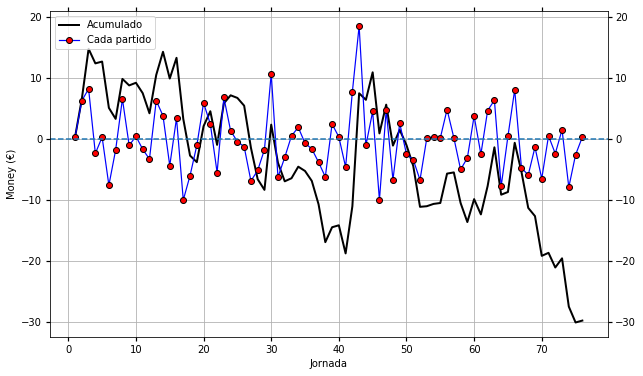

In [215]:
gain_journey = np.array(gain_journey)
fig, ax = plt.subplots(figsize=(10,6))
ax.tick_params(which='both',direction='out', length=4, width = 1.2,
        labelbottom=True,labeltop=False,labelleft=True,
        labelright=True,bottom=True,top=True,left=True,right=True)

ax.plot(range(1,int(len(data)/10)+1), [np.sum(gain_journey[:i]) for i in range(1,int(len(data)/10)+1)], 
        color='k', lw=2, label='Acumulado')
ax.plot(range(1,int(len(data)/10)+1), gain_journey, marker='o', color='blue', 
        mec='k', mfc='r', linewidth=1.2, label='Cada partido')
ax.axhline(y=0, ls='--')
ax.set_xlabel('Jornada')
ax.set_ylabel('Money (€)')
ax.legend(loc=2)
plt.grid(True)

# fig.savefig('VirtualGain1819.png', bbox_inches='tight')

In [208]:
from keras.models import load_model

model.save('zeit.h5')  # creates a HDF5 file